# Лабораторная 7.  Логистическая регрессия

Логистическая регрессия является одним из статистических методов классификации с использованием линейного дискриминанта Фишера.
В отличие от обычной регрессии, в методе логистической регрессии не производится предсказание значения числовой переменной исходя из выборки исходных значений. Вместо этого, значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу.

Логистическую регрессию стоит использовать в следующих случаях:
- Бинарная классификация: Когда целевая переменная является бинарной (двухклассовой) и требуется прогнозировать вероятность принадлежности к одному из классов.
- Линейная зависимость: Когда существует линейная или линейно-подобная зависимость между предикторами (признаками) и целевой переменной.
- Небольшое количество данных: Логистическая регрессия может быть эффективной, когда у вас есть ограниченное количество данных.
Не стоит:
- Нелинейные зависимости: Когда связь между предикторами и целевой переменной нелинейна, логистическая регрессия может быть недостаточно гибкой.
- Многоклассовая классификация: Логистическая регрессия изначально предназначена для бинарной классификации, и для решения задач с более чем двумя классами может потребоваться обобщение (например, использование метода "один против всех" или "один против одного").
- Большое количество данных и высокие вычислительные требования: При наличии большого объема данных и возможности использовать более сложные модели, такие как ансамбли или нейронные сети, логистическая регрессия может не дать наилучших результатов.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import math
from prettytable import PrettyTable
import warnings


In [27]:
data = pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Обработка Данных

In [28]:
print(data.info)
print(data.shape)
data.isnull().sum()

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
X = data.drop('Outcome', axis=1)
Y = data['Outcome'] #ц.п.
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [30]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

 Видно что отсутстующих значений и категориальных признаков нет, дополнительная обработка не требуется

 Разделение данных

In [31]:
# Список индексов данных
indices = list(range(len(X)))

# Размер тестовой выборки
test_size = 0.2 # 20%

# Начальное состояние генератора случайных чисел
random.seed(42)
#Перемешиваем индексы, чтобы при делении данных они были представлены случайным образом
random.shuffle(indices)

split_index = int(len(X) * test_size)
# Разделение данных Индексы используются для извлечения соответствующих частей данных
X_train = X.iloc[indices[split_index:]]
X_test = X.iloc[indices[:split_index]]
Y_train = Y.iloc[indices[split_index:]]
Y_test = Y.iloc[indices[:split_index]]

In [32]:
print('X_train ->', X_train.shape)
print('X_test ->', X_test.shape)
print('Y_train ->', Y_train.shape)
print('Y_test ->', Y_test.shape)

X_train -> (615, 8)
X_test -> (153, 8)
Y_train -> (615,)
Y_test -> (153,)


Масштабирование

In [34]:
# масштабирует значения в столбце так, чтобы они находились в диапазоне от 0 до 1.
for column_name, params in X_test.items():
  minimum = min(params)
  maximum = max(params)
  difference = maximum - minimum
  X_test[column_name] = (X_test[column_name] - minimum) / difference

<ipython-input-34-2931723bd4cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column_name] = (X_test[column_name] - minimum) / difference


In [37]:
for column_name, params in X_train.items():
  minimum = min(params)
  maximum = max(params)
  difference = maximum - minimum
  X_train[column_name] = (X_train[column_name] - minimum) / difference

<ipython-input-37-b1d5dde762fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column_name] = (X_train[column_name] - minimum) / difference


In [38]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
489,0.470588,0.974874,0.655738,0.000000,0.000000,0.439394,0.198542,0.766667
451,0.117647,0.673367,0.573770,0.000000,0.000000,0.486532,0.194683,0.033333
637,0.117647,0.472362,0.622951,0.181818,0.088710,0.531987,0.240566,0.033333
399,0.176471,0.969849,0.573770,0.313131,0.000000,0.587542,0.065609,0.066667
452,0.000000,0.457286,0.557377,0.323232,0.282258,0.671717,0.125643,0.066667


In [39]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
490,0.133333,0.421320,0.570175,0.518519,0.078014,0.548435,0.323547,0.063830
593,0.133333,0.416244,0.456140,0.407407,0.135934,0.424739,0.951850,0.085106
719,0.333333,0.492386,0.666667,0.500000,0.000000,0.530551,0.176160,0.659574
174,0.133333,0.380711,0.561404,0.444444,0.065012,0.442623,0.171462,0.255319
595,0.000000,0.954315,0.719298,0.259259,0.218676,0.476900,0.354668,0.021277


 ## Реализация метода логистической регресии
  Определяем сигмоидную функцию. Формула сигмоидной функции:
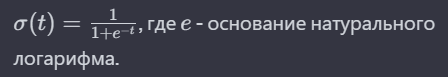
  и функцию потерь ( принимает два аргумента: Y_actual - фактические метки классов (0 или 1), и Y_predicted - предсказанные вероятности принадлежности к классу 1)

In [40]:
def sig(t):
    return 1 / (1 + np.exp(-t))
# насколько хорошо, модель предсказывавет метки
def cost(Y_actual, Y_predicted):
    return -np.mean(Y_actual * np.log(Y_predicted) + (1 - Y_actual) * np.log(1 - Y_predicted))

 Определяем методы обучения

Обновление весов и смещения в направлении, противоположном градиенту, с использованием заданной скорости обучения, является ключным шагом в градиентном спуске. Этот подход направлен на минимизацию функции потерь и обеспечивает сходимость алгоритма обучения.
обновление весов и смещения в направлении, противоположном градиенту, помогает двигаться в сторону минимума функции потерь.

(z - Y_train): Разность между предсказанными вероятностями и истинными метками.
np.dot(X_train.T, (z - Y_train)): Скалярное произведение матрицы признаков и разности предсказанных и истинных значений.
(1 / objects_num): Нормализация по числу объектов в обучающей выборке.

In [41]:
# Градиентный спуск
def gradient_descent(X_train, Y_train, iterations, learning_rate):
    objects_num, characteristics_num = X_train.shape
    #Веса и смещение инициализируются нулями.
    weights = np.zeros(characteristics_num)
    losses = []
    bias = 0
    # Рассчет предсказанных значений и градиентов (Рассчитываются предсказанные значения (z) и градиенты по весам (dw) и по смещению (db))
    for iteration in range(1, iterations + 1):

        t = np.dot(X_train, weights) + bias
        #  prediction
        z = sig(t)
        # по весам
        dw = (1 / objects_num) * np.dot(X_train.T, (z - Y_train))
        # по смещению
        db = (1 / objects_num) * np.sum(z - Y_train)
        # Веса и смещение обновляются в направлении, противоположном градиенту, с использованием заданной скорости обучения (learning_rate).
        weights -= learning_rate * dw
        bias -= learning_rate * db

        #Функция потерь записывается каждые 100 итераций для отслеживания процесса обучения.
        if iteration % 100 == 0:
            loss = cost(Y_train, z)
            losses.append(loss)
    #Возвращение коэффициентов и функции потерь
    coeff = {'weights': weights, 'bias': bias}
    return coeff, losses

In [42]:
# Оптимизация Ньютона
def newton_optimization(X_train, Y_train, iterations):
    objects_num, characteristics_num = X_train.shape

    weights = np.zeros(characteristics_num)
    losses = []
    bias = 0

    for iteration in range(1, iterations + 1):

        t = np.dot(X_train, weights) + bias
        #  prediction
        z = sig(t)

        # по весам
        dw = (1 / objects_num) * np.dot(X_train.T, (z - Y_train))
        # по смещению
        db = (1 / objects_num) * np.sum(z - Y_train)
        #матрицу вторых производных функции потерь относительно весов. Он используется для определения направления и размера шага в методе Ньютона.
        hessian = (1 / objects_num) * (X_train.T @ ((z * (1 - z)) * X_train.T).T)

        weights -= np.linalg.inv(hessian) @ dw
        bias -= db

        if iteration % 100 == 0:
            loss = cost(Y_train, z)
            losses.append(loss)
            # print(f'{iteration}) cost = {loss}')

    coeff = {'weights': weights, 'bias': bias}
    return coeff, losses

Метод Ньютона обычно сходится быстрее, чем градиентный спуск, но может быть более вычислительно затратным из-за вычисления обратной матрицы Гессиана. Он также может быть более чувствителен к начальной точке, чем градиентный спуск.

In [43]:
# Определяем функцию предсказания
def predict(X_test, coeff):
    #Извлекаются веса и смещение из словаря coeff
    weights = coeff['weights']
    bias = coeff['bias']
    # применяется сигмоидная функция для получения вероятностей принадлежности к классу 1.
    t = np.dot(X_test, weights) + bias

    z = sig(t)
# Функция возвращает бинарные предсказания: 1, если вероятность превышает порог 0.6
    return (z > 0.6).astype(int)

# Оценка модели

 Определим функцию для подсчета метрик

In [44]:
def calculate_metrics(Y_prediction, Y_test):
    TP = np.sum((Y_prediction == 1) & (Y_test == 1))
    TN = np.sum((Y_prediction == 0) & (Y_test == 0))
    FP = np.sum((Y_prediction == 1) & (Y_test == 0))
    FN = np.sum((Y_prediction == 0) & (Y_test == 1))

    # Точность (Accuracy): доля правильных предсказаний
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    # Точность (Precision): доля правильно предсказанных положительных классов относительно всех предсказанных положительных классов
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    # Полнота (Recall): доля правильно предсказанных положительных классов относительно всех фактически положительных классов
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    # F1-мера (F1 Score): среднее гармоническое между точностью и полнотой
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    return {'accuracy': accuracy, 'precision': precision,  'recall': recall, 'f1_score': f1_score}

 Исследование гиперпараметров (скорости обучения и числа итераций)

In [45]:
 # Создадим вариации гиперпараметров (скорости обучения и числа итераций).
rates = [0.01, 0.2, 0.375, 0.5]
iterations = [100, 1000, 5000]

In [46]:
max_f1_score = 0
best_params = {}
table = PrettyTable(['method', 'rate', 'iterations', 'accuracy', 'precision', 'recall', 'f1_score', 'losses'])
table.align['rate'] = "l"
table.align['iterations'] = "l"
table.align['accuracy'] = "l"
table.align['precision'] = "l"
table.align['recall'] = "l"
table.align['f1_score'] = "l"
table.align['losses'] = "l"

#  Для метода градиентного спуска.пробегают по всем комбинациям скоростей и чисел итераций.
# Для каждой комбинации обучается модель методом градиентного спуска, делается предсказание и вычисляются метрики производительности.
for rate in rates:
    for iteration in iterations:

        coeff, losses = gradient_descent(X_train, Y_train, iteration, rate)
        Y_prediction = predict(X_test, coeff)

        metrics = calculate_metrics(Y_prediction, Y_test)
        #Если значение F1-меры превышает текущий максимум, обновляются лучшие параметры.
        if (metrics['f1_score'] > max_f1_score):
            best_params = {'method': gradient_descent.__name__, 'rate': rate, 'iterations': iteration, 'accuracy': metrics['accuracy'], 'precision': metrics['precision'], 'recall': metrics['recall'], 'f1_score': metrics['f1_score'], 'losses': losses[0] - losses[len(losses) - 1]}

        table.add_row([gradient_descent.__name__, rate, iteration, metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1_score'], losses[0] - losses[len(losses) - 1]])

#  Для метода Ньютона
for iteration in iterations:

    coeff, losses = newton_optimization(X_train, Y_train, iteration)
    Y_prediction = predict(X_test, coeff)

    metrics = calculate_metrics(Y_prediction, Y_test)

    if (metrics['f1_score'] > max_f1_score):
        best_params = {'method': newton_optimization.__name__, 'rate': '-', 'iterations': iteration, 'accuracy': metrics['accuracy'], 'precision': metrics['precision'], 'recall': metrics['recall'], 'f1_score': metrics['f1_score'], 'losses': losses[0] - losses[len(losses) - 1]}

    table.add_row([newton_optimization.__name__, '-', iteration, metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1_score'], losses[0] - losses[len(losses) - 1]])

print(table)

+---------------------+-------+------------+--------------------+--------------------+---------------------+---------------------+----------------------+
|        method       | rate  | iterations | accuracy           | precision          | recall              | f1_score            | losses               |
+---------------------+-------+------------+--------------------+--------------------+---------------------+---------------------+----------------------+
|   gradient_descent  | 0.01  | 100        | 0.6013071895424836 | 0                  | 0.0                 | 0                   | 0.0                  |
|   gradient_descent  | 0.01  | 1000       | 0.6013071895424836 | 0                  | 0.0                 | 0                   | 0.029989532332527657 |
|   gradient_descent  | 0.01  | 5000       | 0.6013071895424836 | 0                  | 0.0                 | 0                   | 0.08038821404821395  |
|   gradient_descent  | 0.2   | 100        | 0.6013071895424836 | 0         

In [22]:
 # Выведем лучшую калибровку гиперпараметров
best_params_table = PrettyTable(['method', 'rate', 'iterations', 'accuracy', 'precision', 'recall', 'f1_score', 'losses'])
best_params_table.add_row([best_params['method'], best_params['rate'], best_params['iterations'], best_params['accuracy'], best_params['precision'], best_params['recall'], best_params['f1_score'], best_params['losses']])
print(best_params_table)

+---------------------+------+------------+--------------------+-----------+--------------------+-------------------+---------------------+
|        method       | rate | iterations |      accuracy      | precision |       recall       |      f1_score     |        losses       |
+---------------------+------+------------+--------------------+-----------+--------------------+-------------------+---------------------+
| newton_optimization |  -   |    5000    | 0.7189542483660131 |    0.75   | 0.4426229508196721 | 0.556701030927835 | 0.05782816516573308 |
+---------------------+------+------------+--------------------+-----------+--------------------+-------------------+---------------------+
